CLEANING THE DATASETS FROM TEXTS FILE TO COMMA SEPERATED VALUES (CSV)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'],)
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [2]:
dataset.shape

(2075259, 7)

In [3]:
#mark all missing values
from numpy import nan
dataset.replace('?', nan, inplace=True)

In [4]:
# adding a column for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [5]:
# saving the updated dataset
dataset.to_csv('household_power_consumption.csv')

In [7]:
# loading the new file
dataset = pd.read_csv('household_power_consumption.csv', header=0, low_memory=False, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'],)
print(dataset.shape)
dataset.head()

(2075259, 8)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


NOW WE ARE DONE WITH THE CLEANING, TIME TO WORK ON THE CLEANED DATASET 

In [8]:
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,15.766666
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,15.733334
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,15.633333


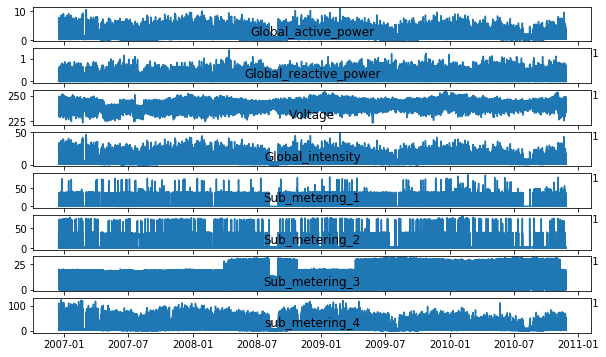

In [9]:
# creating line plot for each of the 8 variables since the data is a multivariate time series
plt.figure(figsize=(10,6))
for i in range(len(dataset.columns)):
    plt.subplot(len(dataset.columns), 1, i+1)
    name = dataset.columns[i]
    plt.plot(dataset[name])
    plt.title(name, y=0)
plt.show()

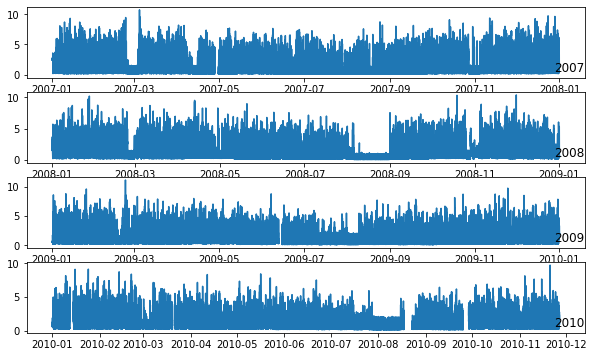

In [10]:
# plotting global active power for each year, removing 2006 because it has less than one month of data
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(10,6))
for i in range(len(years)):
    #preparing the subplot
    sub = plt.subplot(len(years), 1, i+1)
    #determine the year to plot
    year = years[i]
    #get all observations for the year
    result = dataset[str(year)]
    #plot the global active power for the year
    plt.plot(result['Global_active_power'])
    #adding title to the subplot
    plt.title(str(year), y=0, loc='right')
plt.show()

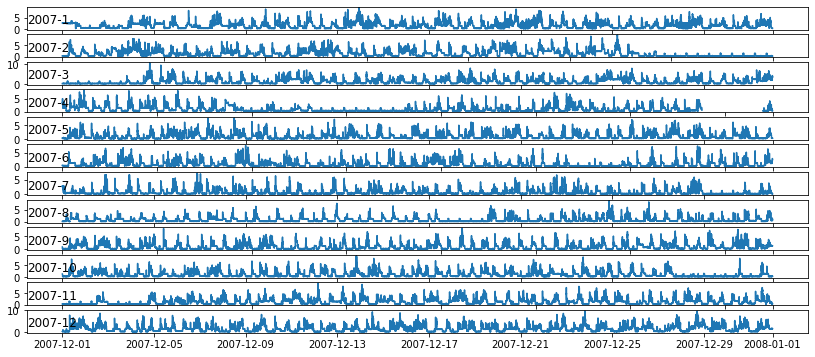

In [11]:
#We can continue to zoom in on consumption and look at active power for each of the 12 months of 2007

#plot active power for each year
months = [x for x in range(1,13)]
plt.figure(figsize=(14,6))
for i in range(len(months)):
    sub = plt.subplot(len(months), 1, i+1)
    #determine month to plot
    month = '2007-' + str(months[i])
    #get all observations for the month
    result = dataset[month]
    plt.plot(result['Global_active_power'])
    plt.title(month, y=0, loc='left')
plt.show()

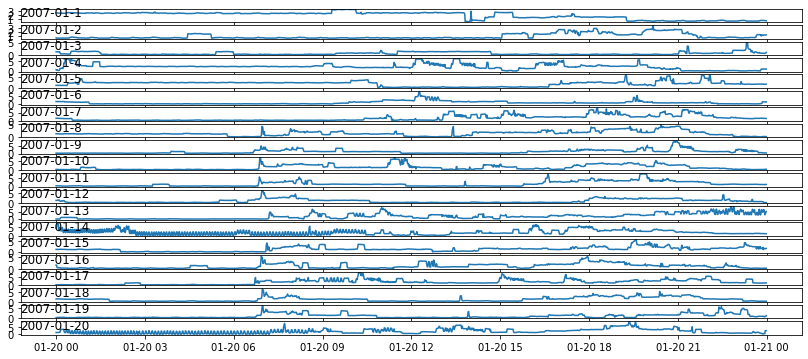

In [12]:
#taking a closer look at power consumption at the daily level

days = [x for x in range(1,21)]
plt.figure(figsize=(14,6))
for i in range(len(days)):
    sub = plt.subplot(len(days), 1, i+1)
    day = '2007-01-' + str(days[i])
    #get all observations for the day
    result = dataset[day]
    plt.plot(result['Global_active_power'])
    plt.title(day, y=0, loc='left')
plt.show()

TIME SERIES DATADISTRIBUTIONS

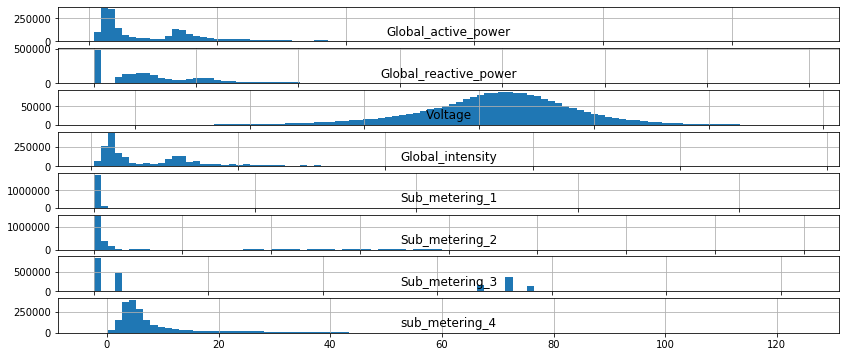

In [13]:
#creating a histogram for each variable in thetime series

plt.figure(figsize=(14,6))
for i in range(len(dataset.columns)):
    plt.subplot(len(dataset.columns), 1, i+1)
    name = dataset.columns[i]
    dataset[name].hist(bins=100)
    plt.title(name, y=0)
plt.show()

THE DISTRIBUTION OF ACTIVE POWER APPERARS TO BE BI-MODAL, MEANING IT LOOKS LIKE IT HAS TWO MEAN GROUPS OF
OBSERVATIONS.
WE CAN INVESTIGATE IT FURTHER BY LOOKING AT THE DISTRIBUTION OF ACTIVE POWER CONSUMPTION FOR THE FOUR FULL YEARS OF DATA.

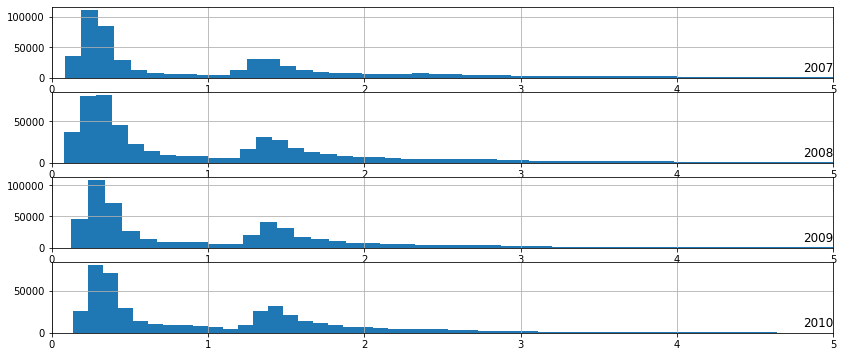

In [14]:
#plotting active power for each year

years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(14,6))
for i in range(len(years)):
    ax = plt.subplot(len(years), 1, i+1)
    year = years[i]
    result = dataset[str(year)]
    result['Global_active_power'].hist(bins=100)
    ax.set_xlim(0, 5)
    plt.title(str(year), y=0, loc='right')
plt.show()

We can still investigate for each month

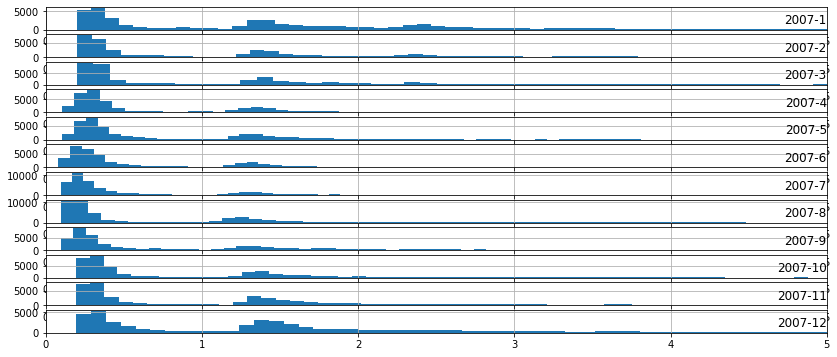

In [15]:
#plotting active power for each month in a year

months = [x for x in range(1, 13)]
plt.figure(figsize=(14,6))
for i in range(len(months)):
    ax = plt.subplot(len(months), 1, i+1)
    month = '2007-' + str(months[i])
    result = dataset[month]
    result['Global_active_power'].hist(bins=100)
    ax.set_xlim(0, 5)#zoom in on the distribution
    plt.title(month, y=0, loc='right')
plt.show()

In [16]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   sub_metering_4         float64
dtypes: float64(8)
memory usage: 142.5 MB


In [18]:
dataset.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
sub_metering_4           25979
dtype: int64

In [19]:
dataset = dataset.fillna(dataset.mean())
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,15.766666
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,15.733334
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,15.633333


In [20]:
dataset_daily = dataset.resample('D').sum()
dataset_daily

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011
...,...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0,16924.600023
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0,16352.266679
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0,13769.466664


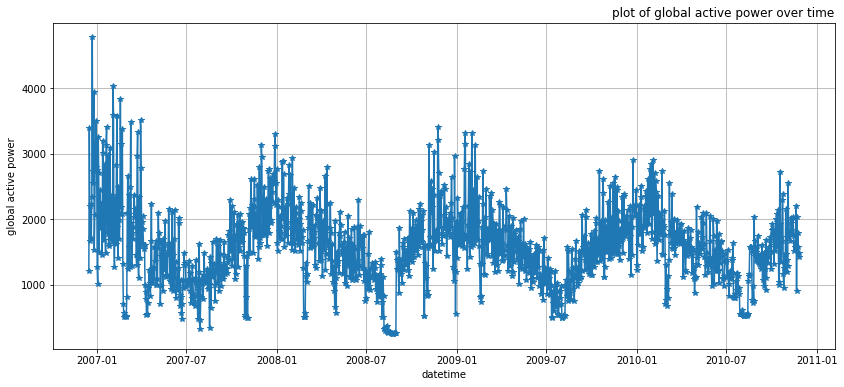

In [21]:
plt.figure(figsize=(14,6))
plt.plot(dataset_daily.Global_active_power, marker='*')
plt.grid()
plt.xlabel('datetime')
plt.ylabel('global active power')
plt.title('plot of global active power over time', loc='right')
plt.show()

In [22]:
import scipy 
import scipy.stats
from scipy.stats import pearsonr

In [23]:
corr1,_ = pearsonr(dataset_daily.Global_active_power, dataset_daily.Global_reactive_power)
corr1

0.041097837359968706

In [24]:
C,_ = pearsonr(dataset_daily.Voltage, dataset_daily.Global_intensity,)
C

0.052267003605872595

dividing the dataset into train and test set. the last 365 days is the test set, 
while the first (x-365) days is the train set.

In [25]:
train = dataset_daily.iloc[:1077,:]#indexing the first 1077 rows of the dataset as the train set


In [26]:
train.shape

(1077, 8)

In [27]:
Test = dataset_daily.iloc[1077:,:]#indexing the last 365 rows as test set

In [28]:
Test.shape

(365, 8)

In [54]:
!conda install -c conda-forge fbprophet -y

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\AJULOR FRESH\anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    conda-4.9.0                |   py37hf50a25e_1         3.1 MB  conda-forge
    convertdate-2.2.2          |     pyh9f0ad1d_0          33 KB  conda-forge
    ephem-3.7.7.1              |   py37h4ab8f01_1         715 KB  conda-forge
    fbprophet-0.6              |   py37h6538335_0         521 KB  conda-forge
    holidays-0.10.3            |     pyh9f0ad1d_0          61 KB  conda-forge
    ko



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [30]:
from fbprophet import Prophet

In [31]:
train.reset_index(inplace = True)
train.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011


In [32]:
ch_train = train.iloc[:,:2]

In [33]:
ch_train

,datetime,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1072,2009-11-22,2450.976
1073,2009-11-23,1471.122
1074,2009-11-24,2128.856
1075,2009-11-25,1980.130


In [37]:
ch_train = ch_train.rename(columns={'datetime': 'ds', 'Global_active_power': 'y'})
ch_train.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [39]:
Test.reset_index(inplace=True)
Test.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2009-11-27,1380.026,133.052,348276.70,5704.0,0.0,396.0,11599.0,11005.433317
1,2009-11-28,1858.950,225.218,347898.89,7784.8,3199.0,386.0,14350.0,13047.499967
2,2009-11-29,1650.962,191.056,350364.56,6878.4,1073.0,3061.0,7828.0,15554.033356
3,2009-11-30,1745.190,153.382,351020.60,7232.2,1080.0,361.0,12039.0,15606.500007
4,2009-12-01,1756.378,141.874,349391.74,7312.8,0.0,354.0,10821.0,18097.966729


In [40]:
ch_Test = Test.iloc[:,:2]
ch_Test.head()

,datetime,Global_active_power
0,2009-11-27,1380.026
1,2009-11-28,1858.950
2,2009-11-29,1650.962
3,2009-11-30,1745.190
4,2009-12-01,1756.378


In [41]:
ch_Test = ch_Test.rename(columns={'datetime': 'ds', 'Global_active_power': 'y'})
ch_Test.head()

,ds,y
0,2009-11-27,1380.026
1,2009-11-28,1858.950
2,2009-11-29,1650.962
3,2009-11-30,1745.190
4,2009-12-01,1756.378


In [46]:
model = Prophet(daily_seasonality=True)
model.fit(ch_train)

C:\Users\AJULOR FRESH\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [47]:
forecast = model.predict(ch_Test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1228.390218,1568.593192,2639.480181,1228.390218,1228.390218,870.692795,870.692795,870.692795,352.012579,...,-64.134297,-64.134297,-64.134297,582.814513,582.814513,582.814513,0.0,0.0,0.0,2099.083013
1,2009-11-28,1228.512379,1823.848941,2961.174982,1228.512379,1228.512379,1173.862433,1173.862433,1173.862433,352.012579,...,245.826460,245.826460,245.826460,576.023394,576.023394,576.023394,0.0,0.0,0.0,2402.374812
2,2009-11-29,1228.634540,1829.116488,2958.634030,1228.634540,1228.634540,1147.798666,1147.798666,1147.798666,352.012579,...,228.529959,228.529959,228.529959,567.256127,567.256127,567.256127,0.0,0.0,0.0,2376.433205
3,2009-11-30,1228.756701,1437.897060,2536.669766,1228.756701,1228.756701,747.741924,747.741924,747.741924,352.012579,...,-161.290444,-161.290444,-161.290444,557.019789,557.019789,557.019789,0.0,0.0,0.0,1976.498625
4,2009-12-01,1228.878862,1548.290868,2625.158404,1228.878862,1228.878862,868.520816,868.520816,868.520816,352.012579,...,-29.333312,-29.333312,-29.333312,545.841549,545.841549,545.841549,0.0,0.0,0.0,2097.399678


In [48]:
#selecting the ones we need 
#yhat is the prediction
forecast[['ds','trend','yhat','yhat_lower','yhat_upper','trend_upper']].head()

,ds,trend,yhat,yhat_lower,yhat_upper,trend_upper
0,2009-11-27,1228.390218,2099.083013,1568.593192,2639.480181,1228.390218
1,2009-11-28,1228.512379,2402.374812,1823.848941,2961.174982,1228.512379
2,2009-11-29,1228.634540,2376.433205,1829.116488,2958.634030,1228.634540
3,2009-11-30,1228.756701,1976.498625,1437.897060,2536.669766,1228.756701
4,2009-12-01,1228.878862,2097.399678,1548.290868,2625.158404,1228.878862


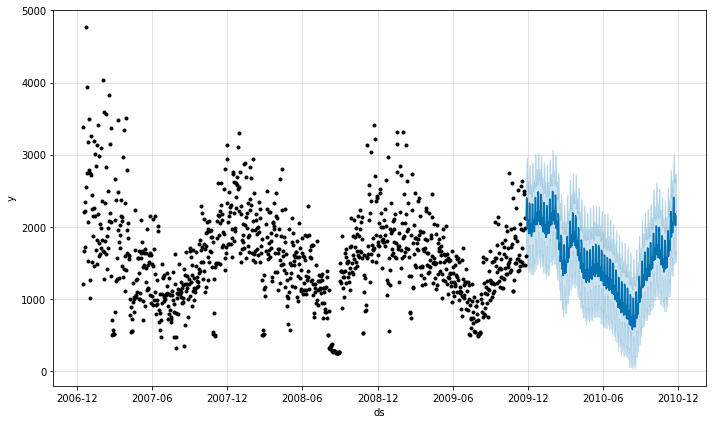

In [54]:
model.plot(forecast)
plt.show()

In [55]:
from sklearn import metrics

In [56]:
def metric(y_true,y_pred):
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))* 100

In [57]:
MAPE = metric(ch_Test['y'],forecast['yhat'])
round(MAPE,2)

20.82

In [59]:
RMSE = np.sqrt(metrics.mean_squared_error(ch_Test['y'],forecast['yhat']))
round(RMSE,4)

374.6092

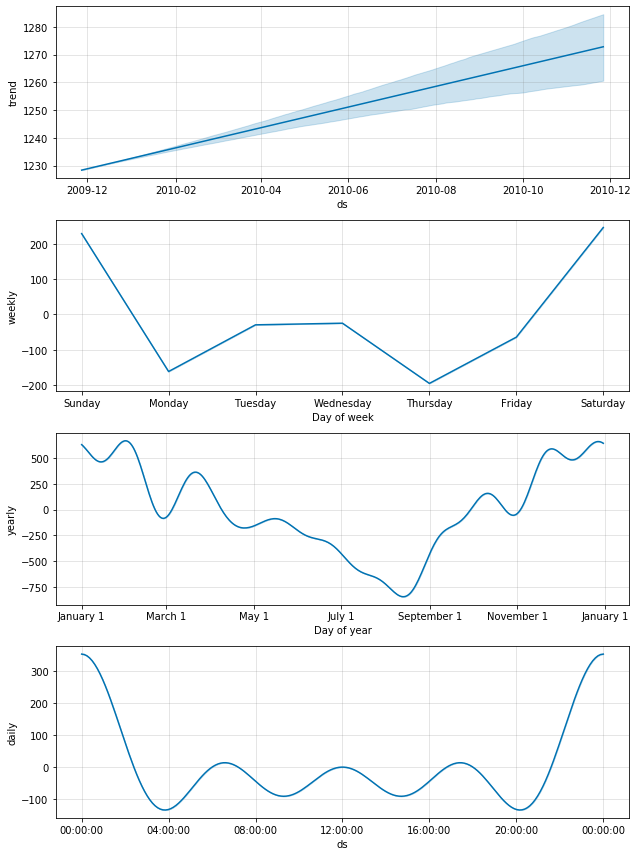

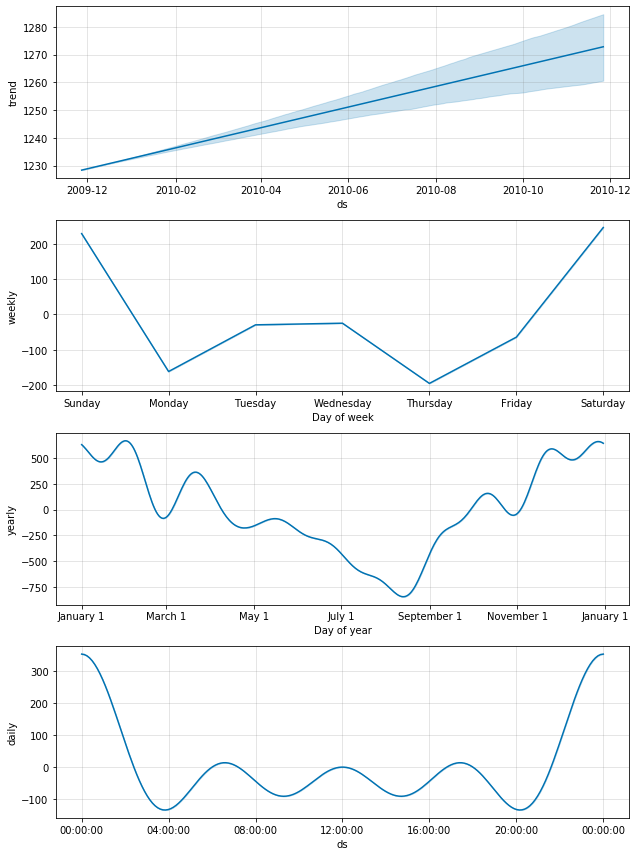

In [60]:
model.plot_components(forecast)

WE USED ONLY GLOBAL ACTIVE POWER PREVIOUSLY, NEXT WE WILL BUILD A TIME SERIES MODEL USING THE OTHER VARIABLES 

In [61]:
dataset_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011


In [62]:
dataset_daily.reset_index(inplace=True)
dataset_daily.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011


In [73]:
new_dataset_daily = dataset_daily.rename(columns = {'datetime':'ds',
                                                   'Global_active_power':'y',
                                                   'Global_reactive_power':'add1',
                                                   'Voltage':'add2',
                                                   'Global_intensity':'add3',
                                                   'Sub_metering_1':'add4',
                                                   'Sub_metering_2':'add5',
                                                   'Sub_metering_3':'add6'})

In [74]:
new_dataset_daily.head(4)

,ds,y,add1,add2,add3,add4,add5,add6,sub_metering_4
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043


In [75]:
new_train = new_dataset_daily.iloc[:1077,:]
new_test =  new_dataset_daily.iloc[1077:,:]
print(new_train.shape, new_test.shape)

(1077, 9) (365, 9)


In [78]:
#creating the model
model = Prophet(daily_seasonality=True)
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

In [79]:
model = model.fit(new_train)

C:\Users\AJULOR FRESH\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [80]:
prediction = model.predict(new_test)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1309.740352,1365.246367,1396.354897,1309.740352,1309.740352,7.550205,7.550205,7.550205,0.613756,...,-0.117152,-0.117152,-0.117152,2.386150,2.386150,2.386150,0.0,0.0,0.0,1381.045689
1,2009-11-28,1309.867693,1846.238569,1877.971915,1309.867693,1309.867693,-8.896954,-8.896954,-8.896954,0.504977,...,1.415656,1.415656,1.415656,2.703117,2.703117,2.703117,0.0,0.0,0.0,1861.861941
2,2009-11-29,1309.995035,1629.181613,1661.380490,1309.995035,1309.995035,-2.800695,-2.800695,-2.800695,1.214891,...,0.174246,0.174246,0.174246,3.054443,3.054443,3.054443,0.0,0.0,0.0,1644.143983
3,2009-11-30,1310.122376,1726.404569,1758.870940,1310.122376,1310.122376,3.922286,3.922286,3.922286,1.403777,...,-0.342567,-0.342567,-0.342567,3.444772,3.444772,3.444772,0.0,0.0,0.0,1742.706811
4,2009-12-01,1310.249717,1745.686966,1778.574022,1310.249717,1310.249717,5.975906,5.975906,5.975906,0.934797,...,-1.671786,-1.671786,-1.671786,3.877941,3.877941,3.877941,0.0,0.0,0.0,1762.427761


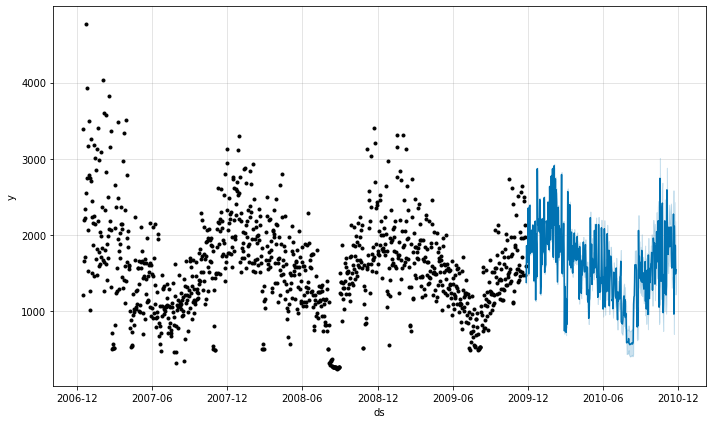

In [81]:
model.plot(prediction)
plt.show()

In [82]:
def metric(y_true,y_pred):
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))* 100

In [84]:
MAPE = metric(new_test['y'],prediction['yhat'])
round(MAPE,2)

2.77

In [85]:
RMSE = np.sqrt(metrics.mean_squared_error(new_test['y'],prediction['yhat']))
round(RMSE,4)

41.062

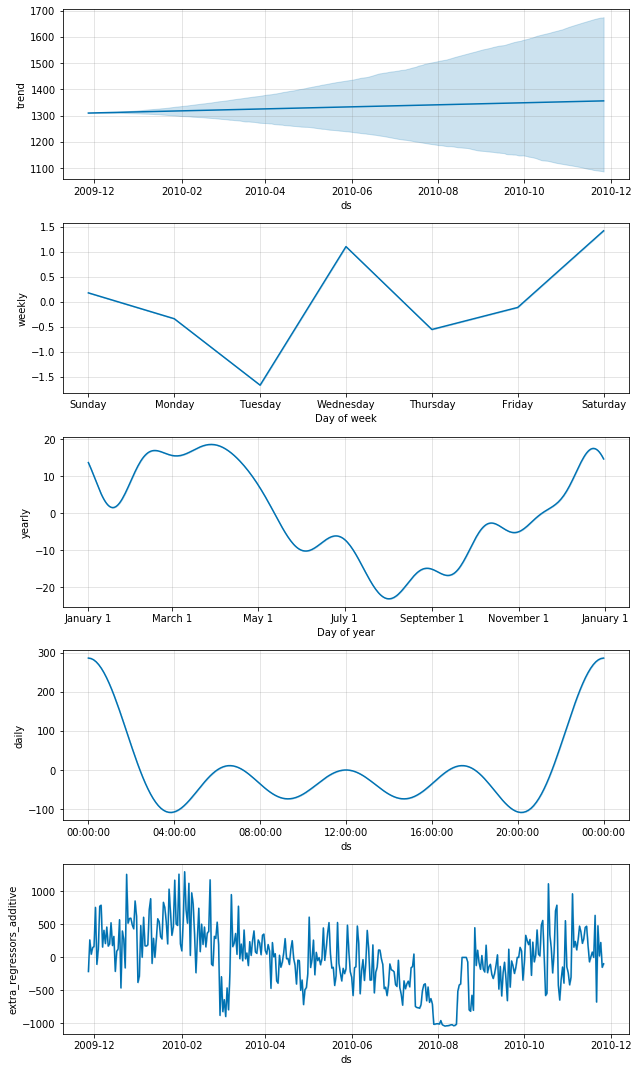

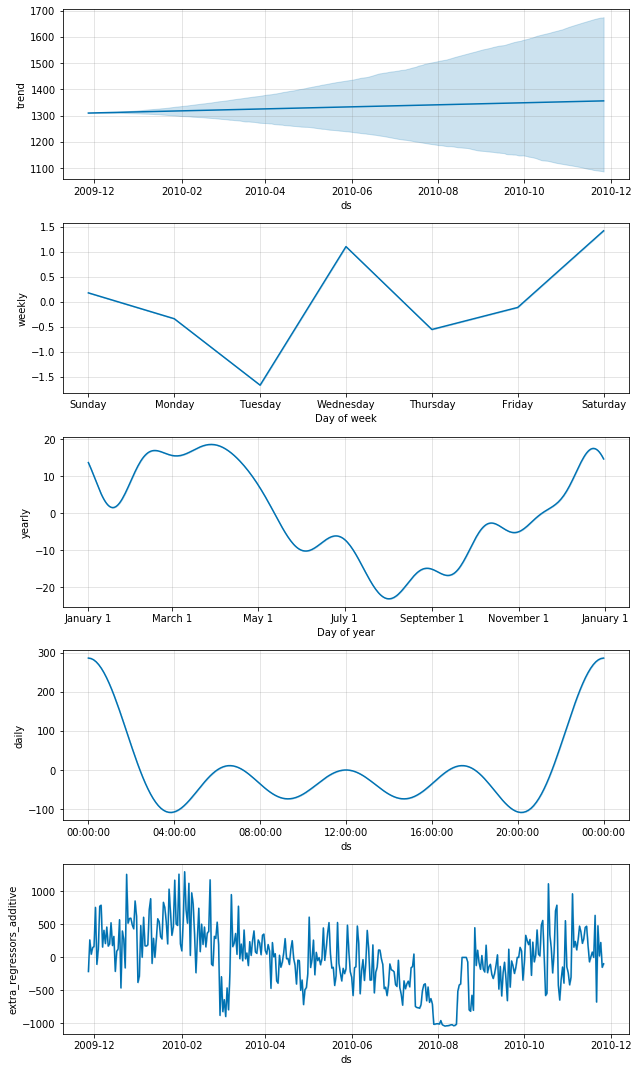

In [86]:
model.plot_components(prediction)